# Animation

Animation with matplotlib is probably one of its most underrated uses. In this lesson, we will explore how to build these animations. The first thing to do is create a dataset, in the code below I build a very simple dataset meant to represent populations of three cities.

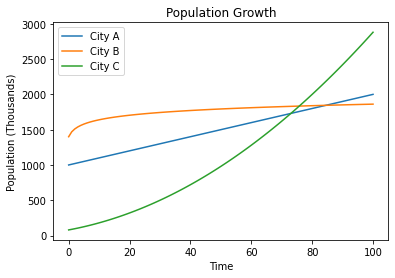

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create some random data
t = np.arange(0,101,1)
A = 1000 + t * 10
B = 1400 + np.log(t+1) * 100
C = 80 *  ((t+20) / 20) **2

population_growth = pd.DataFrame(zip(A,B,C), index=t,
                                columns=['City A', 'City B', 'City C'])

#Random data plotted which represents city populations
population_growth.plot(kind='line')
plt.xlabel("Time")
plt.ylabel("Population (Thousands)")
plt.title("Population Growth")
plt.show()

What if we wanted to see how the different cities compare at a point in time? Plotting the bar graph like below works for one time period, but we do not want to have to plot 101 of them.

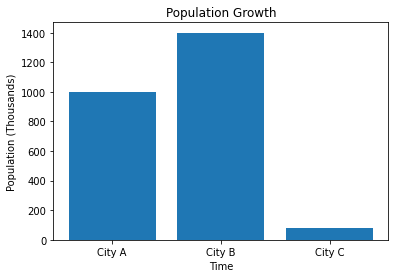

In [2]:
#We would not want to have to plot 101 of these graphs would we?
plt.bar(population_growth.columns, population_growth.values[0])
plt.xlabel("Time")
plt.ylabel("Population (Thousands)")
plt.title("Population Growth")
plt.show()

For animation, we need to define two functions. One function for initialization purposes, and one for the updates. Essentially we get to pass frames to the update function which then updates our variables. In the code below, we first have the function init() which clears anything on the ax object, sets the limit to 3000 for the y-axis, and sets a ylabel. Next we have the update function, each time a new frame is called, we first remove all the bars currently in it, then plot the new bars and change the title. The new bars that we plot are found by taking the variable i (which is the frame) and finding the row for it. So if we get i=5, then we would do iloc[5] to get the fifth rows values. The other parts are setting up the actual graph and then the function itself FuncAnimation. This function takes fig (the figure we created), the update and init functions we pass, frames (we pass the numbers from 0-100 so our frames update to grab those rows. If we did something like 0-105, we would get an error on 101 since there is no row corresponding to 101), interval which represents the length between frames, and finally repeat which if set to true has the animation restart and continue in a loop. One thing to note, we need to call %matplotlib notebook in the beginning for this to work.

In [3]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

#We need an init function for creating the plot
def init():
    ax.clear()
    ax.set_ylim(0, 3000)
    ax.set_ylabel("Population (Thousands)")
    
#Function for each frame update
def update(i):
    #Iterate through all bars and remove them
    for bar in ax.containers:
        bar.remove()
    #Plot the row that the frame is on
    ax.bar(population_growth.columns, population_growth.iloc[i].values, color='blue')
    #Set the title
    ax.set_title("Population at Time: {}".format(i))

fig, ax = plt.subplots()
#Plot the starting populations
ax.bar(population_growth.columns, population_growth.iloc[0].values, color='blue')
#Build the animation
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=list(range(len(population_growth))), 
                         interval=250, repeat=True)
anim

<IPython.core.display.Javascript object>

If you then run after this the code below, you get a gif image. This can be opened up in chrome or another web browser to see the gif as a stand-alone!

In [4]:
#You can save this to a gif as well!
anim.save("Animation1.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


Use plt.close() to shutdown the plots.

In [5]:
#Close the plots
plt.close()

Let’s revisit the 3D plot from before. This time, we will also change the view. The function view_init() takes an elevation and a degrees of rotation for setting the view.

In [6]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

#Remember this from the 3-D plotting tutorial?
X = list(range(0,11))
Y = list(range(0,11))
X,Y = np.meshgrid(X, Y)
Z = (X - 7) ** 2 + (Y - 7) ** 2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)

#view_init takes an elevation and a degrees of rotation for setting the intial view
ax.view_init(30, 0)

plt.show()

<IPython.core.display.Javascript object>

Now, if we make a simple update function that sets the rotation to (30,i) where i is the frame, and pass the numbers 0-359 with repeat equal to true, we get a really cool rotating surface plot!

<IPython.core.display.Javascript object>


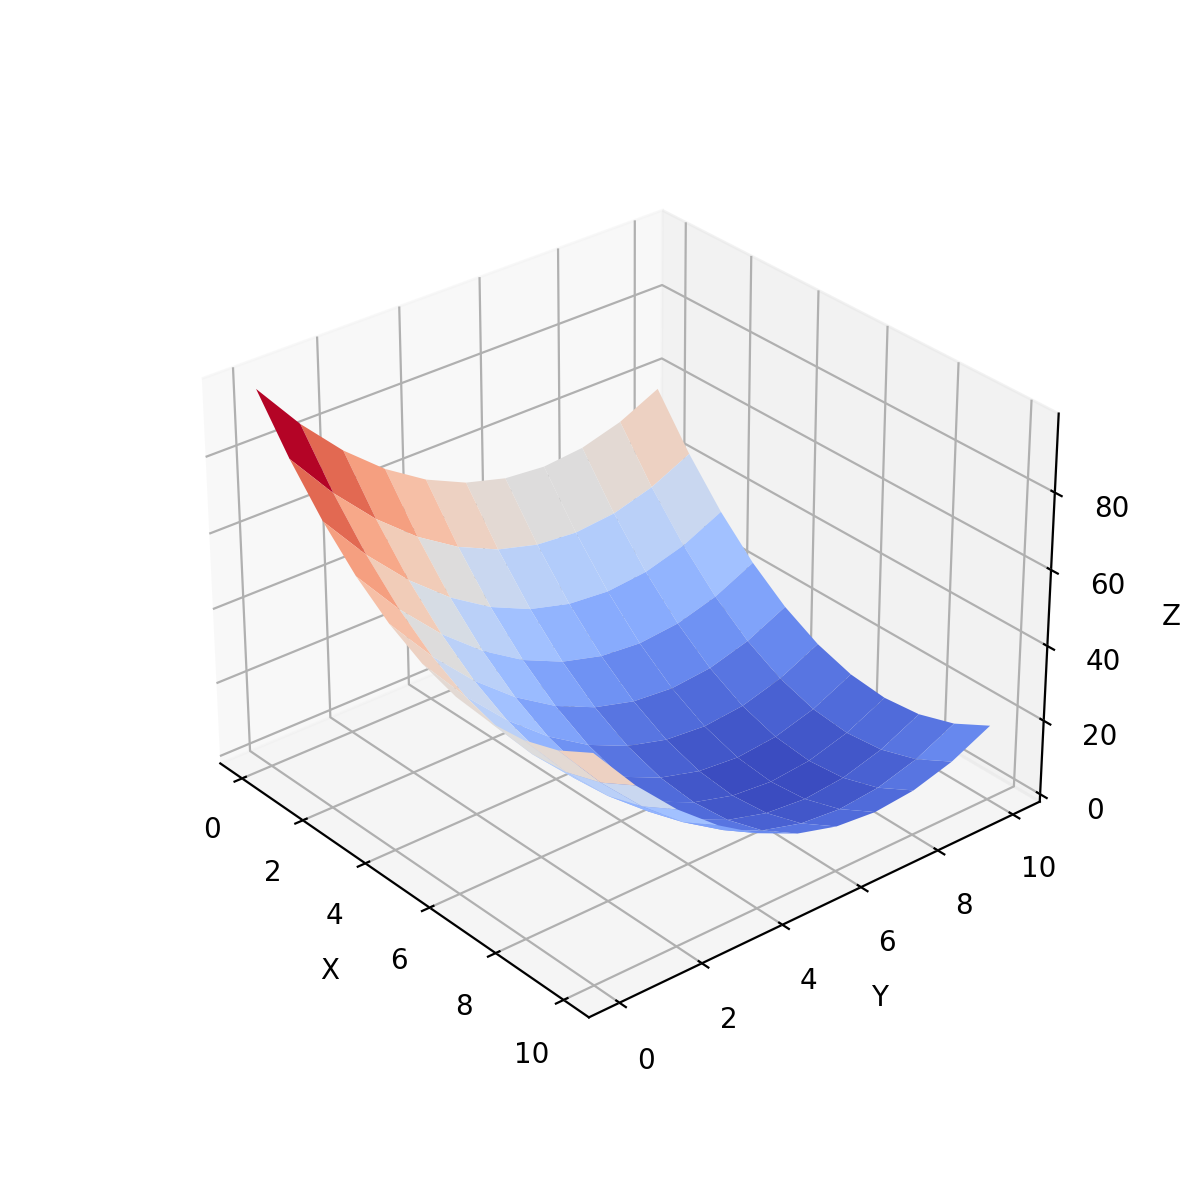

In [7]:
plt.close()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)

#Nothing needs to be done here
def init():
    pass
    
#Function for each frame update to keep changing the view by 1 degree
def update(i):
    ax.view_init(30, i)

#Animation
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=list(range(360)), 
                         interval=5, repeat=True)


Of course, we can save this too.

In [8]:
#Save to a gif as well
anim.save("3D Plot Animation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
